In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, precision_recall_curve
from IPython.display import display_html

### Область работы 2 (поиск  модели .... )

In [27]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [28]:
df = pd.read_csv(path_train)

#### Заменяем в столбце quality значения больше или равные 7 на 1, а меньше 7 - на 0

In [29]:
df["quality"] = np.where(df['quality'] >= 7, 1, 0)

#### Разделяем данные на тренировочный и проверочный наборы

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']), df.quality, stratify = df.quality)

Так как нам надо покупать хорошие вина и не покупать плохие, то нам важнее, чтобы в предсказанных хороших винах не было мусора из класса плохих вин, при этом ошибки в классе хороших вин нам не так важны.
Если мы определим хорошее вино, как плохое, то мы просто его не купим и никто не расстроится, но если мы определим плохое вино как хорошее, то кому-то будет грустно, поэтому выбираем метрику precision.

Рассмотрим такие методы как метод ближайших соседей, логистическую регрессию и наивного байеса:

### Метод ближайших соседей

In [31]:
pipe =  Pipeline([
            ('preprocessing', RobustScaler()), 
            ('classifier',     KNeighborsClassifier ())
            ])
n_neighbors  = [50, 250, 450, 650, 850]
p = [25,50,75,90]
weights = ['uniform','distance']

param_grid = [
    {'preprocessing': [MinMaxScaler(), StandardScaler(), RobustScaler(), Normalizer()],
    'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights,
     'classifier__n_jobs': [-1] 
    }
] 

grid = GridSearchCV(pipe,param_grid, cv=StratifiedShuffleSplit(n_splits = 5, random_state = 42),
                    scoring = 'precision', return_train_score = True, n_jobs =-1) 
grid.fit(X_train, y_train)
    

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=None,
            train_size=None),
             estimator=Pipeline(steps=[('preprocessing', RobustScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [KNeighborsClassifier(n_jobs=-1,
                                                              n_neighbors=650,
                                                              p=25,
                                                              weights='distance')],
                          'classifier__n_jobs': [-1],
                          'classifier__n_neighbors': [50, 250, 450, 650, 850],
                          'classifier__p': [25, 50, 75, 90],
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(

In [32]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,101,109,117,132,140,148,156,65,125,112,...,146,147,150,151,152,153,154,155,158,159
mean_fit_time,0.007701,0.013004,0.028799,0.007515,0.020066,0.007716,0.007894,0.035242,0.024018,0.01098,...,0.012422,0.008089,0.017301,0.033292,0.014518,0.00626,0.012854,0.006773,0.032443,0.017383
std_fit_time,0.001202,0.012637,0.027207,0.000936,0.026961,0.000569,0.001411,0.0347,0.03483,0.008528,...,0.001099,0.002198,0.010117,0.033426,0.015475,0.000385,0.000434,0.000404,0.034266,0.013865
mean_score_time,0.620728,0.544123,0.530399,0.335044,0.518894,0.5433,0.646976,0.680557,0.588838,0.603053,...,0.507225,0.582613,0.687508,0.392515,0.622736,0.410407,0.463871,0.54969,0.545566,0.662901
std_score_time,0.181454,0.133087,0.097259,0.122079,0.161793,0.093698,0.135461,0.141624,0.130607,0.190499,...,0.112765,0.086121,0.165878,0.226039,0.125973,0.065439,0.085063,0.090038,0.133672,0.076694
param_classifier,"KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...",...,"KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65...","KNeighborsClassifier(n_jobs=-1, n_neighbors=65..."
param_classifier__n_jobs,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
param_classifier__n_neighbors,650,650,650,850,850,850,850,450,650,650,...,850,850,850,850,850,850,850,850,850,850
param_classifier__p,25,50,75,25,50,75,90,25,90,75,...,75,75,75,75,90,90,90,90,90,90
param_classifier__weights,distance,distance,distance,distance,distance,distance,distance,uniform,distance,uniform,...,uniform,uniform,distance,distance,uniform,uniform,uniform,uniform,distance,distance
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),...,RobustScaler(),Normalizer(),RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer(),RobustScaler(),Normalizer()


In [35]:
grid.best_score_

0.8966666666666667

In [36]:
grid.best_params_

{'classifier': KNeighborsClassifier(n_jobs=-1, n_neighbors=650, p=25, weights='distance'),
 'classifier__n_jobs': -1,
 'classifier__n_neighbors': 650,
 'classifier__p': 25,
 'classifier__weights': 'distance',
 'preprocessing': StandardScaler()}

In [85]:
pipe = Pipeline([('preprocessing', StandardScaler()),
                ('classifier',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=650, p=25,
                                      weights='distance'))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=650, p=25,
                                      weights='distance'))])

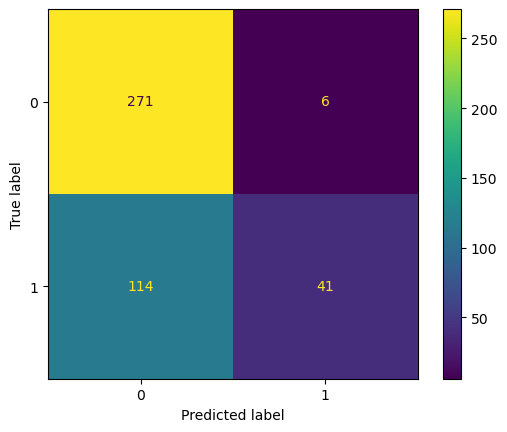

In [86]:
y_pred = pipe.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot();

### Логистическая регресссия

In [106]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 8)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l2','l1','none'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    ]

grid = GridSearchCV(pipe,param_grid, cv=cv, scoring = 'precision', return_train_score = True) 
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=8, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__penalty': ['l2', 'l1', 'none'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True, scoring='precision')

In [107]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,56,57,54,43,40,41,42,44,45,46,...,35,34,33,32,27,26,25,24,22,20
mean_fit_time,0.029522,0.026081,0.027477,0.130952,0.024747,0.023063,0.039882,0.031426,0.016727,0.022192,...,0.004211,0.007796,0.004979,0.00473,0.004004,0.007529,0.004366,0.005133,0.010278,0.003896
std_fit_time,0.002308,0.004217,0.005305,0.017566,0.004664,0.004047,0.014389,0.005783,0.001298,0.002816,...,0.00047,0.000413,0.000578,0.000419,0.000067,0.000479,0.000482,0.000362,0.000533,0.000972
mean_score_time,0.003769,0.003055,0.003258,0.003972,0.004015,0.003839,0.006159,0.004062,0.004365,0.004545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.000736,0.000763,0.000695,0.000859,0.00152,0.000739,0.001686,0.001028,0.000866,0.000766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_clf__penalty,none,none,none,none,none,none,none,none,none,none,...,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1
param_clf__solver,saga,saga,sag,newton-cg,newton-cg,newton-cg,newton-cg,lbfgs,lbfgs,lbfgs,...,sag,sag,sag,sag,lbfgs,lbfgs,lbfgs,lbfgs,newton-cg,newton-cg
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),...,Normalizer(),RobustScaler(),StandardScaler(),MinMaxScaler(),Normalizer(),RobustScaler(),StandardScaler(),MinMaxScaler(),RobustScaler(),MinMaxScaler()
params,"{'clf__penalty': 'none', 'clf__solver': 'saga'...","{'clf__penalty': 'none', 'clf__solver': 'saga'...","{'clf__penalty': 'none', 'clf__solver': 'sag',...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...",...,"{'clf__penalty': 'l1', 'clf__solver': 'sag', '...","{'clf__penalty': 'l1', 'clf__solver': 'sag', '...","{'clf__penalty': 'l1', 'clf__solver': 'sag', '...","{'clf__penalty': 'l1', 'clf__solver': 'sag', '...","{'clf__penalty': 'l1', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l1', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l1', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l1', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l1', 'clf__solver': 'newton-...","{'clf__penalty': 'l1', 'clf__solver': 'newton-..."
split0_test_score,0.656,0.656,0.644628,0.672131,0.656,0.656,0.656,0.656,0.656,0.656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
split1_test_score,0.720339,0.720339,0.720339,0.712963,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
grid.best_score_

0.6900941465768644

In [109]:
grid.best_params_

{'clf__penalty': 'none',
 'clf__solver': 'saga',
 'preprocessing': MinMaxScaler()}

### Байес

In [101]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           GaussianNB())])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 8, random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling, 
     'clf': [GaussianNB(), MultinomialNB(), BernoulliNB()]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv,scoring = 'precision', return_train_score = True)
grid.fit(X_train, y_train)
grid 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=8, random_state=42, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', GaussianNB())]),
             param_grid=[{'clf': [GaussianNB(), MultinomialNB(), BernoulliNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True, scoring='precision')

In [102]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,10,0,1,2,9,3,8,4,7,11,5,6
mean_fit_time,0.007738,0.00696,0.005812,0.006359,0.006064,0.003855,0.005724,0.005678,0.006288,0.005432,0.004066,0.006208
std_fit_time,0.00048,0.001585,0.001173,0.000636,0.000499,0.000331,0.00191,0.001329,0.000877,0.000479,0.000368,0.000384
mean_score_time,0.003293,0.00405,0.003781,0.002497,0.003523,0.002782,0.003329,0.003566,0.004006,0.00363,0.0,0.0
std_score_time,0.000585,0.001059,0.000599,0.000488,0.000527,0.000436,0.000419,0.000789,0.000745,0.000576,0.0,0.0
param_clf,BernoulliNB(),GaussianNB(),GaussianNB(),GaussianNB(),BernoulliNB(),GaussianNB(),BernoulliNB(),MultinomialNB(),MultinomialNB(),BernoulliNB(),MultinomialNB(),MultinomialNB()
param_preprocessing,RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),StandardScaler(),Normalizer(),MinMaxScaler(),MinMaxScaler(),Normalizer(),Normalizer(),StandardScaler(),RobustScaler()
params,"{'clf': BernoulliNB(), 'preprocessing': Robust...","{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': BernoulliNB(), 'preprocessing': Standa...","{'clf': GaussianNB(), 'preprocessing': Normali...","{'clf': BernoulliNB(), 'preprocessing': MinMax...","{'clf': MultinomialNB(), 'preprocessing': MinM...","{'clf': MultinomialNB(), 'preprocessing': Norm...","{'clf': BernoulliNB(), 'preprocessing': Normal...","{'clf': MultinomialNB(), 'preprocessing': Stan...","{'clf': MultinomialNB(), 'preprocessing': Robu..."
split0_test_score,0.559524,0.558511,0.558511,0.558511,0.547059,0.444043,0.0,1.0,0.0,0.0,NaN,NaN
split1_test_score,0.602484,0.569948,0.569948,0.569948,0.6,0.49763,0.0,0.0,0.0,0.0,NaN,NaN
split2_test_score,0.545455,0.566502,0.566502,0.566502,0.572222,0.44664,0.777778,0.0,0.0,0.0,NaN,NaN


In [45]:
grid.best_params_

{'clf': BernoulliNB(), 'preprocessing': RobustScaler()}

### Сравниваем значения, полученные разными методами

Создаем контейнеры для каждого лучшего результата 

In [113]:
pipe_1 = Pipeline([('preprocessing', StandardScaler()),
                ('classifier',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=650, p=25,
                                      weights='distance'))])
pipe_2 = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression(penalty='none', solver='saga'))])
pipe_3 = Pipeline(steps=[('preprocessing', RobustScaler()), ('clf', BernoulliNB())])

pipe_1.fit(X_train,y_train)
pipe_2.fit(X_train,y_train)
pipe_3.fit(X_train,y_train)

y_pred_1 = pipe_1.predict(X_test)
y_pred_2 = pipe_2.predict(X_test)
y_pred_3 = pipe_3.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Построим confusion matrix

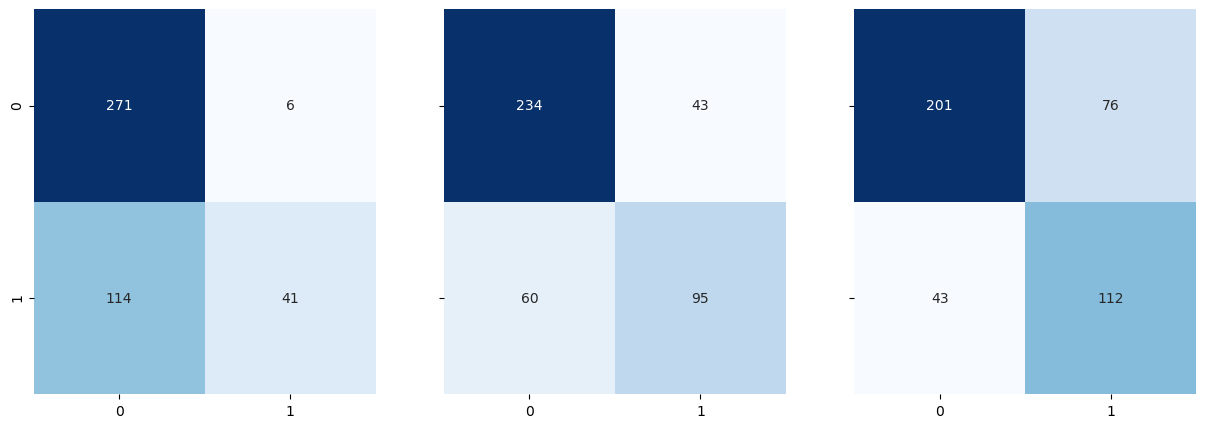

In [114]:
matrix_1=confusion_matrix(y_test,y_pred_1)
matrix_2=confusion_matrix(y_test,y_pred_2)
matrix_3=confusion_matrix(y_test,y_pred_3)

fig,ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 3, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 2)
sns.heatmap(matrix_2,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 3)
sns.heatmap(matrix_3,annot=True, fmt='g', cbar=None,cmap="Blues");

По матрицам видно, что лучший precision будет при методе ближайших соседей, так как минимизируется значение FP, что нам и надо было получить => выбираем метод ближайших соседей
